In [41]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

from matplotlib.ticker import ScalarFormatter

from matplotlib.ticker import MaxNLocator

In [71]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})
df_king['intra_volume（MWh/h）'] =df_king['intra_volume（MWh/h）']*1000/2
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)', '広域予備率平均値(%)' ]

df_select = df_king[cols]
# .dropna()

In [68]:
# df_select

In [70]:
df_king

,DateTime,intra_price(円/kWh),spot_price(円/kWh),gap_price[intra-spot](円/kWh),intra_volume（MWh/h）,spot_volume(kWh),北電太陽光想定(kWh),北電風力想定(kWh),北電太陽光実績(kWh),北電風力実績(kWh),...,絶対値東電風力error(実績-想定)(kWh),絶対値関電太陽光error(実績-想定)(kWh),絶対値関電風力error(実績-想定)(kWh),絶対値中国太陽光error(実績-想定)(kWh),絶対値中国風力error(実績-想定)(kWh),太陽光誤差合算(実績-想定)(kWh)(ならし),風力誤差合算(実績-想定)(kWh)(ならし),太陽光絶対値誤差合算(実績-想定)(kWh),風力絶対値誤差合算(実績-想定)(kWh),広域予備率平均値(%)
0,2018-04-01 00:00:00,7.62,7.30,0.32,58.8,6098500,NaN,NaN,NaN,NaN,...,9533.0,0.0,3293.0,0.0,48.0,0.0,15797.195,0.0,15893.195,NaN
1,2018-04-01 00:30:00,7.52,6.93,0.59,54.0,6225500,NaN,NaN,NaN,NaN,...,9118.0,0.0,3946.0,0.0,1371.0,0.0,14959.670,0.0,17701.670,NaN
2,2018-04-01 01:00:00,7.50,6.78,0.72,57.3,6356500,NaN,NaN,NaN,NaN,...,9874.0,0.0,3179.0,0.0,5228.0,0.0,9111.870,0.0,19567.870,NaN
3,2018-04-01 01:30:00,7.56,6.84,0.72,63.0,6439500,NaN,NaN,NaN,NaN,...,14933.0,0.0,1301.0,0.0,4484.0,0.0,12244.950,0.0,21212.950,NaN
4,2018-04-01 02:00:00,6.89,6.92,-0.03,61.6,6439000,NaN,NaN,NaN,NaN,...,13105.0,0.0,3497.0,0.0,6055.0,0.0,4196.435,0.0,23300.435,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84410,2023-01-05 21:30:00,NaN,21.29,NaN,NaN,22544600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84411,2023-01-05 22:00:00,NaN,21.86,NaN,NaN,22180900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84412,2023-01-05 22:30:00,NaN,21.86,NaN,NaN,22143700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84413,2023-01-05 23:00:00,NaN,21.74,NaN,NaN,22054200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# 

In [5]:


# 広域予備率あり
target =['広域予備率平均値(%)']
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']+target

df_select = df_king[cols].dropna()

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
       ]+target
df_select.columns = re_col
# df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


percent =50
# これは各年

year=2022
start_point = dt.datetime(2022,1,1,0,0)
end_point = dt.datetime(2022,12,31,23,30)
df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

df['judge'] =0

df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

name=re_col[-1]
value0 = df[df['judge']==0][name].values
value1 = df[df['judge']==1][name].values
times =df['DateTime'].dt.date.values
# changePLOT_HIST_oneyear(name,value0,value1,times,year)
# print(f'ない方の平均値{round(value0.mean(),3)}、あるほうの平均値{round(value1.mean(),3)}')


In [95]:
def func_hakohigePLOT(name,start_year,end_year,title,x_label,change_num):

       
       target =[name]
       cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']+target

       df_select = df_king[cols].dropna()

       re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
              ]+target
       df_select.columns = re_col
       # df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


       percent =50
       # これは各年

       # year=2022
       start_point = dt.datetime(year,1,1,0,0)
       end_point = dt.datetime(year,12,31,23,30)
       df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

       df['judge'] =0

       df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
       judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

       df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

       name=re_col[-1]
       value0 = df[df['judge']==0][name].values/change_num
       value1 = df[df['judge']==1][name].values/change_num


       plt.rcParams['font.family'] = 'Times New Roman'
       plt.rcParams['font.size'] =25

       data=[value0,value1]

       fig =plt.figure(figsize=(8,8))
       ax1 = fig.subplots()
       ax1.yaxis.set_major_locator(MaxNLocator(5))
       ax1.boxplot(data,whis=(0,100),vert=True,  # 横向きにする
              patch_artist=True,  # 細かい設定をできるようにする
              widths=0.5,  # boxの幅の設定
              boxprops=dict(facecolor='gray',  # boxの塗りつぶし色の設定
                            color='black', linewidth=1),  # boxの枠線の設定
              medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
              whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
              capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
              )
       ax1.set_xticks(ax1.get_xticks())
       ax1.set_xticklabels(['Negative','Positive'])
       ax1.set_ylabel(x_label)

       y_ticks =np.array(ax1.get_yticks())
       ax1.set_yticks(y_ticks)
       ax1.set_yticklabels(np.round(y_ticks))
       # ax1.set_xlabel('Year')
       plt.title(title
       ,fontname='MS Mincho'
       )
       value0=value0*change_num
       value1 =value1*change_num
       
       num_round = 4
       print(year,target[0])
       print('平均値','negative',round(np.mean(value0),num_round),' ','positive',round(np.mean(value1),num_round))
       print('中央値','negative',round(np.median(value0),num_round),' ','positive',round(np.median(value1),num_round))
       print('標準偏差','negative',round(np.std(value0,ddof=1),num_round),' ','positive',round(np.std(value1,ddof=1),num_round))
       print('四分位範囲','negative',round(np.percentile(value0,75)-np.percentile(value0,25),num_round),' ','positive',round(np.percentile(value1,75)-np.percentile(value1,25),num_round))


In [96]:
# df_king.columns

In [115]:
dpi_n=500
# 出力低下
for year in range(2018,2023):
    title=f'{year} 発電所の出力低下・停止量'
    func_hakohigePLOT('低下量合計',year,year,title,'$10^6$×kW',10**6)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/低下量/{save_name}.png',bbox_inches='tight',dpi=dpi_n)
    plt.close()

# 時間前
for year in range(2018,2023):
    title=f'{year} 時間前市場の取引量'
    func_hakohigePLOT('intra_volume（MWh/h）',year,year,title,'$10^5$×kWh',10**5)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/時間前市場の取引/{save_name}.png',bbox_inches='tight',dpi=dpi_n)
    plt.close()

# スポット

for year in range(2018,2023):
    title=f'{year} スポット市場の取引量'
    func_hakohigePLOT('spot_volume(kWh)',year,year,title,'$10^6$×kWh',10**6)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/スポット市場/{save_name}.png',bbox_inches='tight',dpi=dpi_n)
    plt.close()

# 風力

for year in range(2018,2023):
    title=f'{year} 風力発電誤差'
    func_hakohigePLOT('風力絶対値誤差合算(実績-想定)(kWh)',year,year,title,'$10^3$×kWh',10**3)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/風力/{save_name}.png',bbox_inches='tight',dpi=dpi_n)
    plt.close()

# 太陽光
for year in range(2018,2023):
    title=f'{year} 太陽光発電誤差'
    func_hakohigePLOT('太陽光絶対値誤差合算(実績-想定)(kWh)',year,year,title,'$10^6$×kWh',10**6)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/太陽光/{save_name}.png',bbox_inches='tight',dpi=dpi_n)
    plt.close()
# 広域予備率
func_hakohigePLOT('広域予備率平均値(%)',2022,2022,'広域予備率','%',1)
plt.savefig('../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/まとめ＿添付用/箱ひげ広域予備率.png',bbox_inches='tight',dpi=dpi_n)
plt.savefig('../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/広域予備率/箱ひげ広域予備率.png',bbox_inches='tight',dpi=dpi_n)
plt.close()


2018 低下量合計
平均値 negative 71511962.4825   positive 66106390.5507
中央値 negative 71211665.0   positive 68443150.0
標準偏差 negative 17592739.1269   positive 17143205.5847
四分位範囲 negative 22606372.0   positive 24184767.5
2019 低下量合計
平均値 negative 54500112.8406   positive 54935095.5257
中央値 negative 50689460.0   positive 51511970.0
標準偏差 negative 12889380.0016   positive 12938866.609
四分位範囲 negative 20058590.0   positive 21110975.0
2020 低下量合計
平均値 negative 51970717.991   positive 56118824.7233
中央値 negative 48134370.0   positive 55814670.0
標準偏差 negative 18868399.2259   positive 18887371.1353
四分位範囲 negative 30640030.0   positive 32398345.0
2021 低下量合計
平均値 negative 42228264.7599   positive 45067159.7339
中央値 negative 43067970.0   positive 46294680.0
標準偏差 negative 9104756.7905   positive 10735674.3711
四分位範囲 negative 14333050.0   positive 18220490.0
2022 低下量合計
平均値 negative 46077942.2558   positive 44147211.3056
中央値 negative 45538940.0   positive 42101020.0
標準偏差 negative 12419722.146   positive 10975230.907
四分位

In [111]:
# 指標の値をｄｆで出す関数
def Caliculater(name,start_year,end_year,title,x_label,change_num,rechange_num):

       
       target =[name]
       cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']+target

       df_select = df_king[cols].dropna()

       re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
              ]+target
       df_select.columns = re_col
       # df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


       percent =50
       # これは各年

       # year=2022
       start_point = dt.datetime(year,1,1,0,0)
       end_point = dt.datetime(year,12,31,23,30)
       df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

       df['judge'] =0

       df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
       judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

       df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

       name=re_col[-1]
       value0 = df[df['judge']==0][name].values/change_num
       value1 = df[df['judge']==1][name].values/change_num


       data=[value0,value1]

       value0=value0*change_num/10**rechange_num
       value1 =value1*change_num/10**rechange_num
       
       num_round = 1
       print(year,target[0])
       # print('平均値','negative',round(np.mean(value0),num_round),' ','positive',round(np.mean(value1),num_round))
       # print('中央値','negative',round(np.median(value0),num_round),' ','positive',round(np.median(value1),num_round))
       # print('標準偏差','negative',round(np.std(value0,ddof=1),num_round),' ','positive',round(np.std(value1,ddof=1),num_round))
       # print('四分位範囲','negative',round(np.percentile(value0,75)-np.percentile(value0,25),num_round),' ','positive',round(np.percentile(value1,75)-np.percentile(value1,25),num_round))
       df_show = pd.DataFrame(columns=['平均値','中央値','標準偏差','四分位範囲'],index=['negative','positive'])
       df_show['平均値']=[round(np.mean(value0),num_round),round(np.mean(value1),num_round)]
       df_show['中央値']=[round(np.median(value0),num_round),round(np.median(value1),num_round)]
       df_show['標準偏差']=[round(np.std(value0,ddof=1),num_round),round(np.std(value1,ddof=1),num_round)]
       df_show['四分位範囲']=[round(np.percentile(value0,75)-np.percentile(value0,25),num_round),round(np.percentile(value1,75)-np.percentile(value1,25),num_round)]
       return(df_show)


In [114]:
for year in range(2018,2023):
    title=f'{year} 発電所の出力低下・停止量'
    display(Caliculater('低下量合計',year,year,title,'$10^6$×kW',10**6,5))
 

# 時間前
for year in range(2018,2023):
    title=f'{year} 時間前市場の取引量'
    display(Caliculater('intra_volume（MWh/h）',year,year,title,'$10^5$×kWh',10**5,3))
    

# スポット

for year in range(2018,2023):
    title=f'{year} スポット市場の取引量'
    display(Caliculater('spot_volume(kWh)',year,year,title,'$10^6$×kWh',10**6,5))


# 風力

for year in range(2018,2023):
    title=f'{year} 風力発電誤差'
    display(Caliculater('風力絶対値誤差合算(実績-想定)(kWh)',year,year,title,'$10^5$×kWh',10**5,3))


# 太陽光
for year in range(2018,2023):
    title=f'{year} 太陽光発電誤差'
    display(Caliculater('太陽光絶対値誤差合算(実績-想定)(kWh)',year,year,title,'$10^6$×kWh',10**6,3))

# 広域予備率
display(Caliculater('広域予備率平均値(%)',2022,2022,'広域予備率','%',1,1))



2018 低下量合計


,平均値,中央値,標準偏差,四分位範囲
negative,715.1,712.1,175.9,226.1
positive,661.1,684.4,171.4,241.8


2019 低下量合計


,平均値,中央値,標準偏差,四分位範囲
negative,545.0,506.9,128.9,200.6
positive,549.4,515.1,129.4,211.1


2020 低下量合計


,平均値,中央値,標準偏差,四分位範囲
negative,519.7,481.3,188.7,306.4
positive,561.2,558.1,188.9,324.0


2021 低下量合計


,平均値,中央値,標準偏差,四分位範囲
negative,422.3,430.7,91.0,143.3
positive,450.7,462.9,107.4,182.2


2022 低下量合計


,平均値,中央値,標準偏差,四分位範囲
negative,460.8,455.4,124.2,230.3
positive,441.5,421.0,109.8,191.9


2018 intra_volume（MWh/h）


,平均値,中央値,標準偏差,四分位範囲
negative,86.4,62.7,78.5,86.1
positive,135.3,105.6,116.6,118.9


2019 intra_volume（MWh/h）


,平均値,中央値,標準偏差,四分位範囲
negative,104.4,77.8,91.0,104.4
positive,139.5,100.4,135.6,140.9


2020 intra_volume（MWh/h）


,平均値,中央値,標準偏差,四分位範囲
negative,188.8,143.0,159.3,189.2
positive,258.3,197.0,218.2,242.7


2021 intra_volume（MWh/h）


,平均値,中央値,標準偏差,四分位範囲
negative,182.0,153.4,129.7,167.9
positive,246.1,211.0,174.3,207.7


2022 intra_volume（MWh/h）


,平均値,中央値,標準偏差,四分位範囲
negative,240.8,191.6,177.8,210.4
positive,305.1,266.0,191.9,230.0


2018 spot_volume(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,106.0,91.2,32.7,55.8
positive,111.9,97.4,32.9,57.9


2019 spot_volume(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,162.6,162.3,21.6,29.0
positive,163.1,163.0,23.2,33.9


2020 spot_volume(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,176.4,175.3,22.7,30.8
positive,175.1,173.7,26.1,32.9


2021 spot_volume(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,185.6,183.9,28.4,36.9
positive,185.6,182.2,24.2,30.2


2022 spot_volume(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,176.2,176.6,25.5,35.9
positive,184.3,183.2,26.0,35.6


2018 風力絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,47.0,40.1,28.0,33.8
positive,49.5,41.5,32.5,37.6


2019 風力絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,48.0,42.0,27.9,35.5
positive,47.6,41.8,28.3,35.2


2020 風力絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,46.8,39.5,29.6,37.8
positive,48.8,42.3,29.9,36.7


2021 風力絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,47.6,43.2,26.8,34.7
positive,51.5,47.7,26.4,35.3


2022 風力絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,53.3,49.3,29.1,39.1
positive,52.7,47.0,31.3,34.6


2018 太陽光絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,459.5,152.7,646.0,715.4
positive,461.0,122.6,643.1,751.2


2019 太陽光絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,434.6,4.5,660.5,688.2
positive,455.1,130.2,642.7,723.7


2020 太陽光絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,392.0,10.3,576.9,669.4
positive,414.3,82.5,584.9,679.4


2021 太陽光絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,383.0,25.6,544.5,633.9
positive,350.5,29.2,509.0,564.4


2022 太陽光絶対値誤差合算(実績-想定)(kWh)


,平均値,中央値,標準偏差,四分位範囲
negative,298.5,0.0,509.5,425.9
positive,476.6,268.1,581.9,787.4


2022 広域予備率平均値(%)


,平均値,中央値,標準偏差,四分位範囲
negative,2.4,2.2,0.7,0.8
positive,2.3,2.2,0.7,0.8


In [101]:
Caliculater('広域予備率平均値(%)',2022,2022,'広域予備率','%',1)

2022 広域予備率平均値(%)
平均値 negative 23.5059   positive 23.4766
中央値 negative 21.9828   positive 22.2589
標準偏差 negative 6.7882   positive 6.6254
四分位範囲 negative 7.9306   positive 8.3397


,平均値,中央値,標準偏差,四分位範囲
negative,23.5059,21.9828,6.7882,7.9306
positive,23.4766,22.2589,6.6254,8.3397


2018 低下量合計
平均値 negative 71511962.4825   positive 66106390.5507
中央値 negative 71211665.0   positive 68443150.0
標準偏差 negative 17591486.7518   positive 17141983.819
四分位範囲 negative 22606372.0   positive 24184767.5
2019 低下量合計
平均値 negative 54500112.8406   positive 54935095.5257
中央値 negative 50689460.0   positive 51511970.0
標準偏差 negative 12888644.2854   positive 12938128.0681
四分位範囲 negative 20058590.0   positive 21110975.0
2020 低下量合計
平均値 negative 51970717.991   positive 56118824.7233
中央値 negative 48134370.0   positive 55814670.0
標準偏差 negative 18867326.3958   positive 18886294.7785
四分位範囲 negative 30640030.0   positive 32398345.0
2021 低下量合計
平均値 negative 42228264.7599   positive 45067159.7339
中央値 negative 43067970.0   positive 46294680.0
標準偏差 negative 9104239.8712   positive 10735058.7758
四分位範囲 negative 14333050.0   positive 18220490.0
2022 低下量合計
平均値 negative 46077942.2558   positive 44147211.3056
中央値 negative 45538940.0   positive 42101020.0
標準偏差 negative 12419014.288   positive 10974603.5179
四分

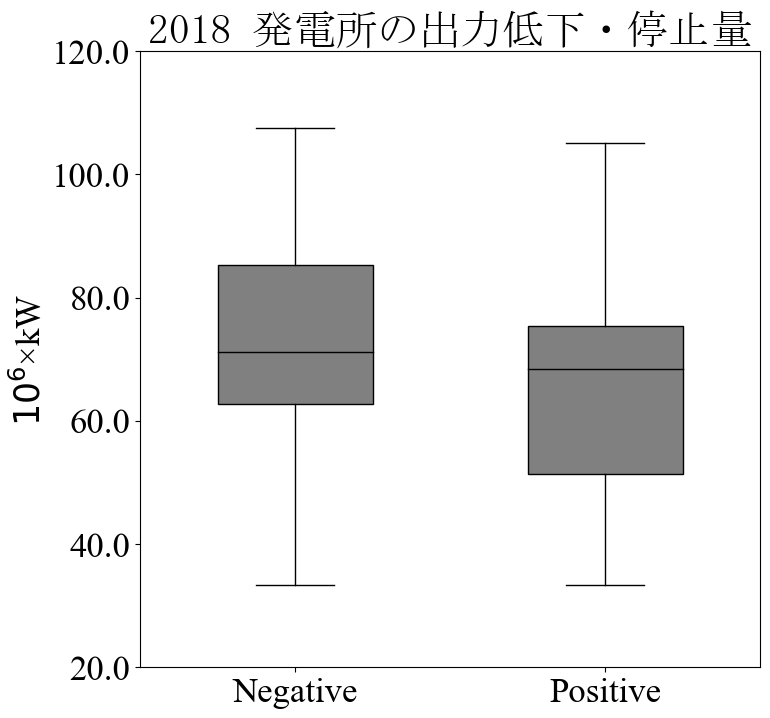

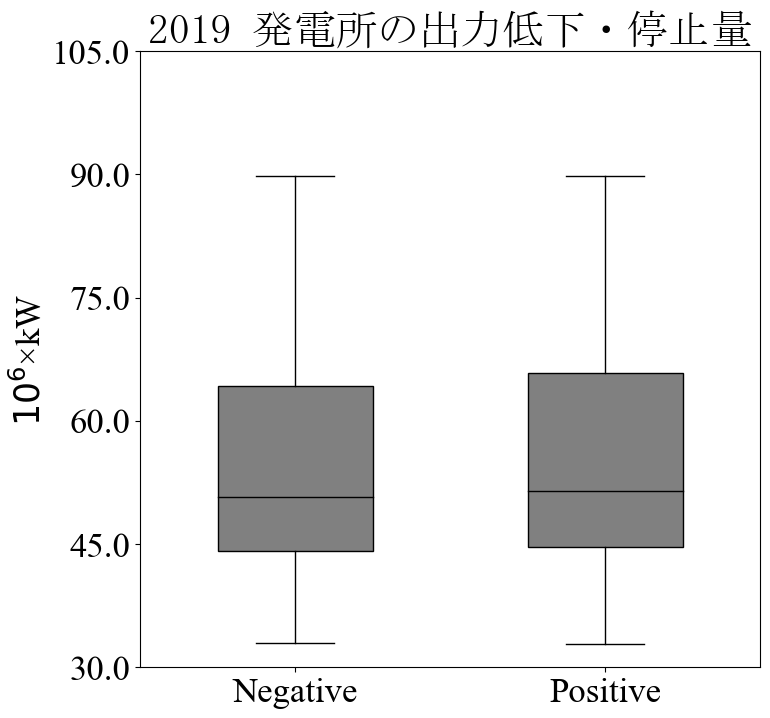

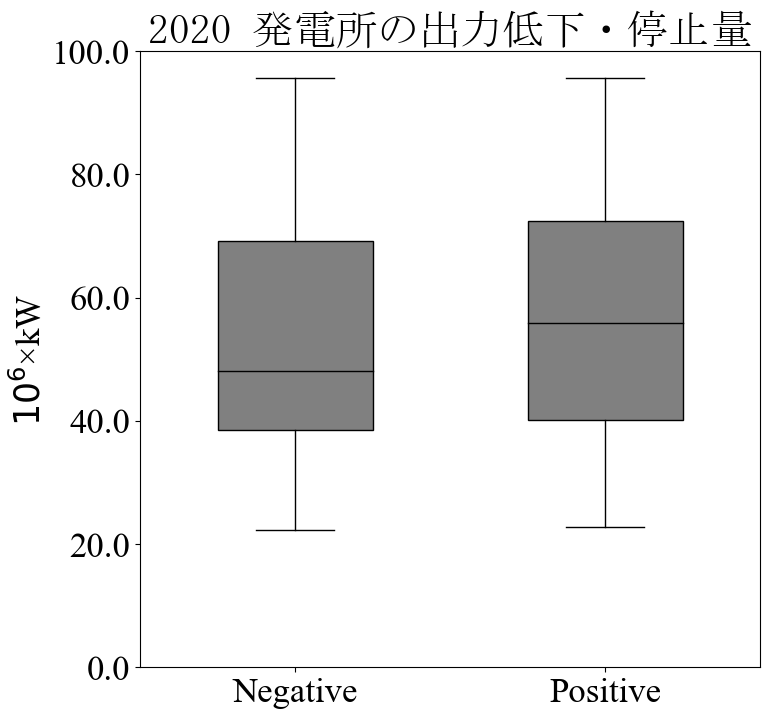

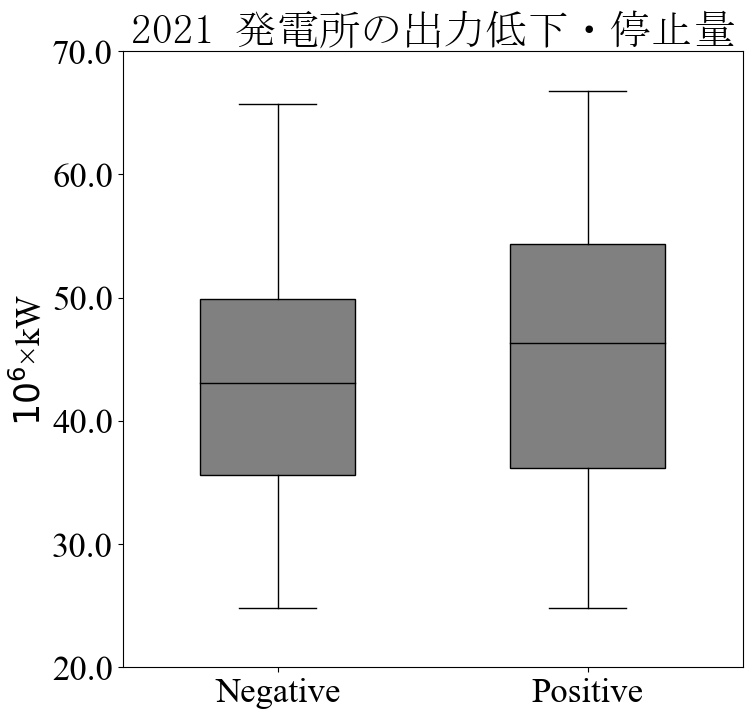

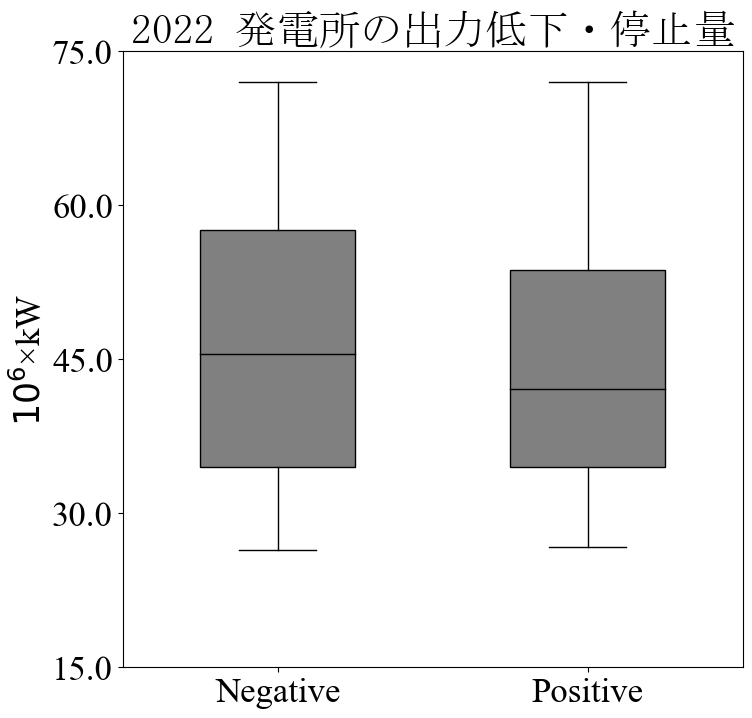

In [83]:
# 出力低下
for year in range(2018,2023):
    title=f'{year} 発電所の出力低下・停止量'
    func_hakohigePLOT('低下量合計',year,year,title,'$10^6$×kW',10**6)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/低下量/{save_name}.png')

2018 intra_volume（MWh/h）
平均値 negative 86406.8764   positive 135293.9353
中央値 negative 62750.0   positive 105650.0
標準偏差 negative 78485.4202   positive 116622.6426
四分位範囲 negative 86137.5   positive 118875.0
2019 intra_volume（MWh/h）
平均値 negative 104381.4212   positive 139545.6963
中央値 negative 77750.0   positive 100400.0
標準偏差 negative 90982.1296   positive 135632.2137
四分位範囲 negative 104412.5   positive 140925.0
2020 intra_volume（MWh/h）
平均値 negative 188810.746   positive 258336.0896
中央値 negative 143000.0   positive 196950.0
標準偏差 negative 159259.154   positive 218196.4274
四分位範囲 negative 189237.5   positive 242737.5
2021 intra_volume（MWh/h）
平均値 negative 181986.5107   positive 246056.8693
中央値 negative 153400.0   positive 211025.0
標準偏差 negative 129739.0599   positive 174312.0417
四分位範囲 negative 167925.0   positive 207725.0
2022 intra_volume（MWh/h）
平均値 negative 240756.463   positive 305129.1986
中央値 negative 191600.0   positive 266000.0
標準偏差 negative 177751.7903   positive 191886.048
四分位範囲 negative

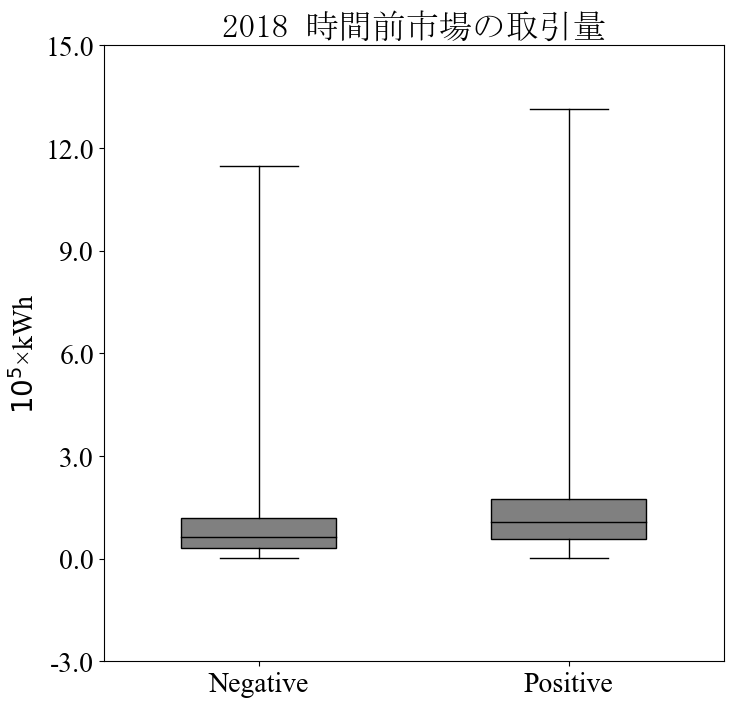

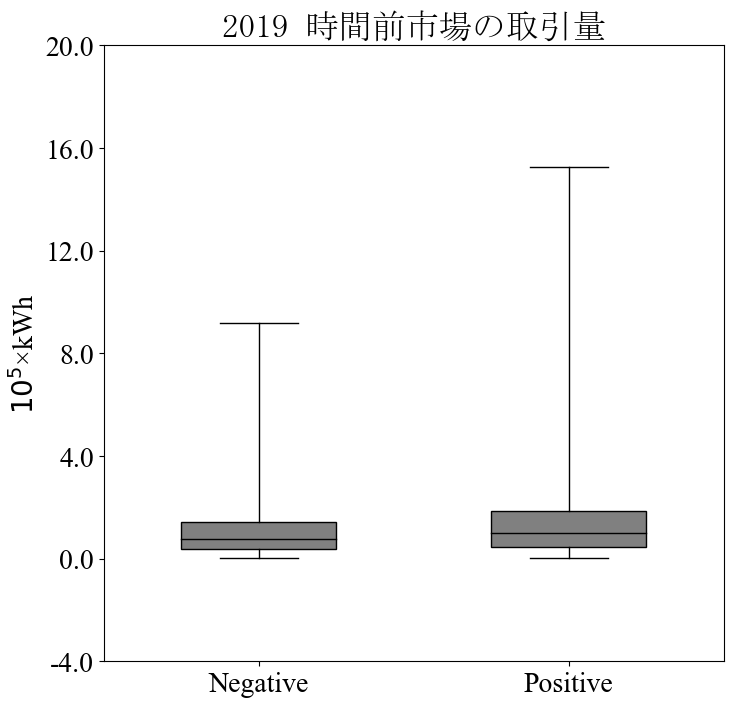

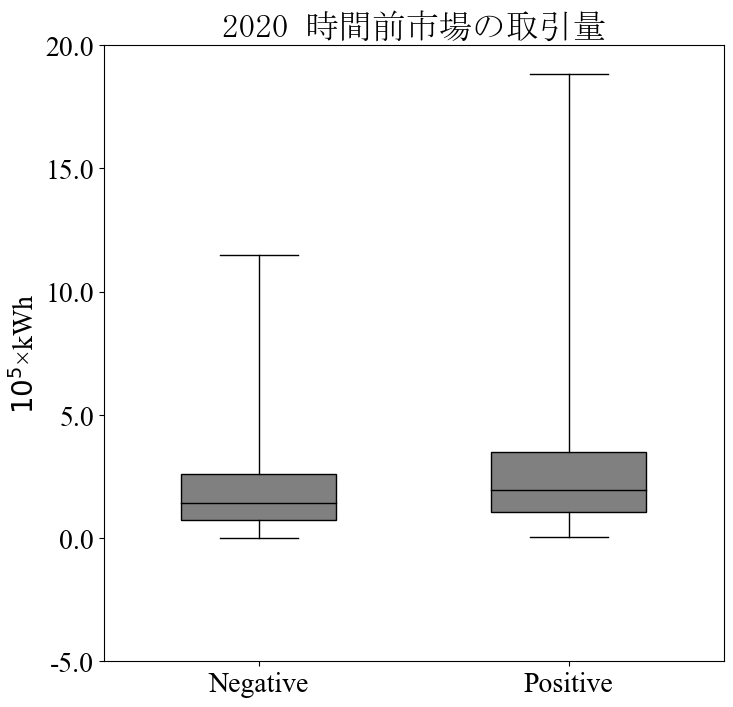

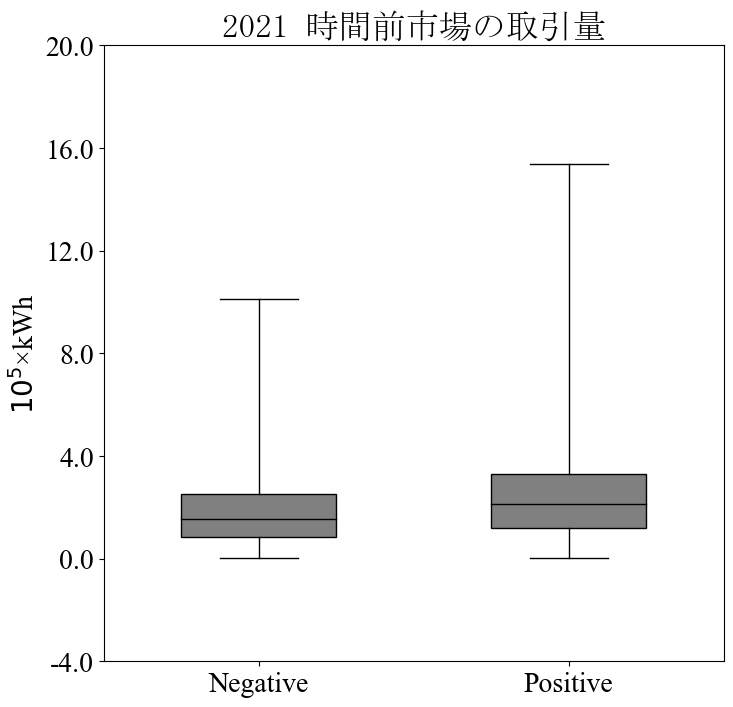

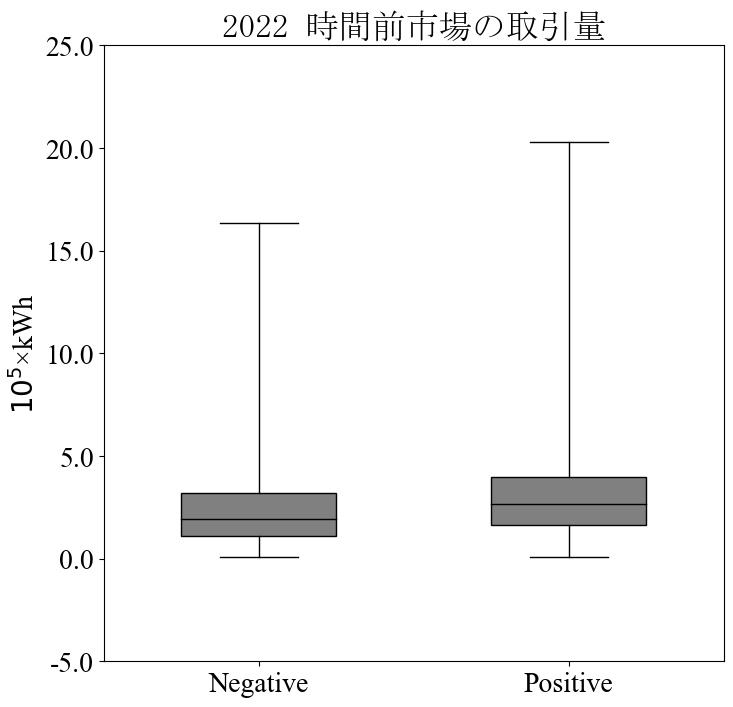

In [76]:
# 時間前
for year in range(2018,2023):
    title=f'{year} 時間前市場の取引量'
    func_hakohigePLOT('intra_volume（MWh/h）',year,year,title,'$10^5$×kWh',10**5)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/時間前市場の取引/{save_name}.png')


2018 spot_volume(kWh)
平均値 negative 10601731.9618   positive 11185828.884
中央値 negative 9120000.0   positive 9736500.0
標準偏差 negative 3272960.0948   positive 3293536.5395
四分位範囲 negative 5578512.5   positive 5792950.0
2019 spot_volume(kWh)
平均値 negative 16263707.0833   positive 16313241.7865
中央値 negative 16234750.0   positive 16302500.0
標準偏差 negative 2162257.1704   positive 2316452.4759
四分位範囲 negative 2898637.5   positive 3386662.5
2020 spot_volume(kWh)
平均値 negative 17643144.5929   positive 17509151.4532
中央値 negative 17529875.0   positive 17369650.0
標準偏差 negative 2268888.2583   positive 2610347.144
四分位範囲 negative 3075312.5   positive 3289312.5
2021 spot_volume(kWh)
平均値 negative 18558190.9447   positive 18556891.0436
中央値 negative 18386950.0   positive 18216925.0
標準偏差 negative 2835787.3782   positive 2418288.8616
四分位範囲 negative 3694100.0   positive 3015025.0
2022 spot_volume(kWh)
平均値 negative 17619710.3613   positive 18427333.9659
中央値 negative 17658500.0   positive 18319350.0
標準偏差 negative 25

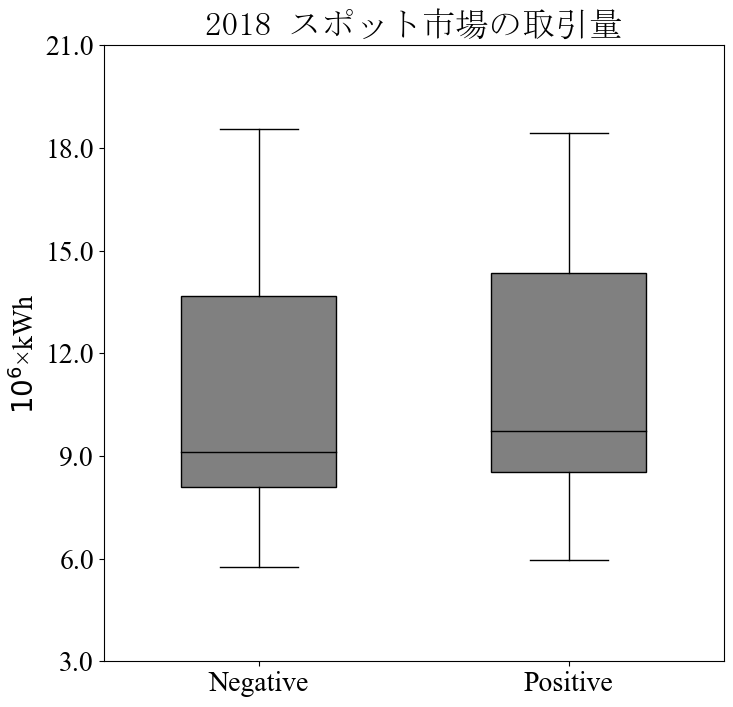

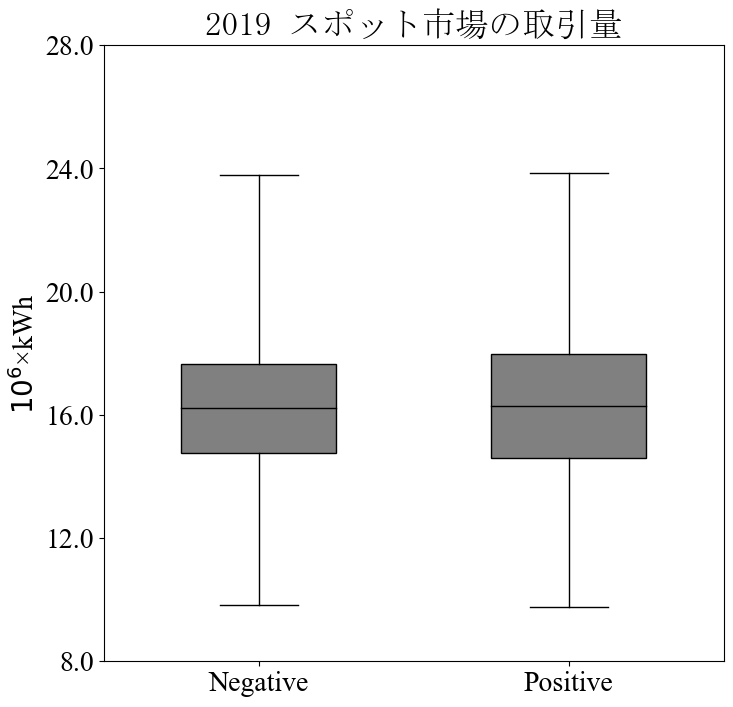

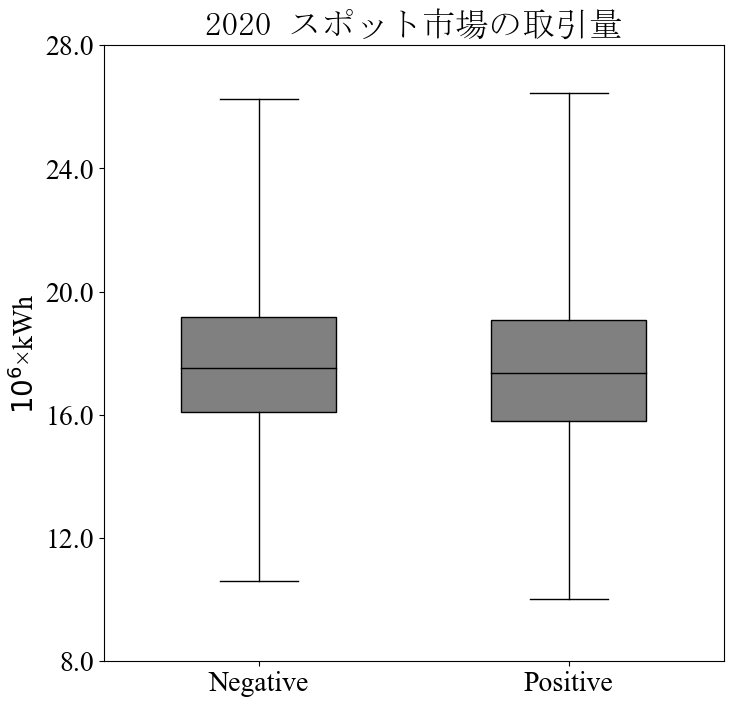

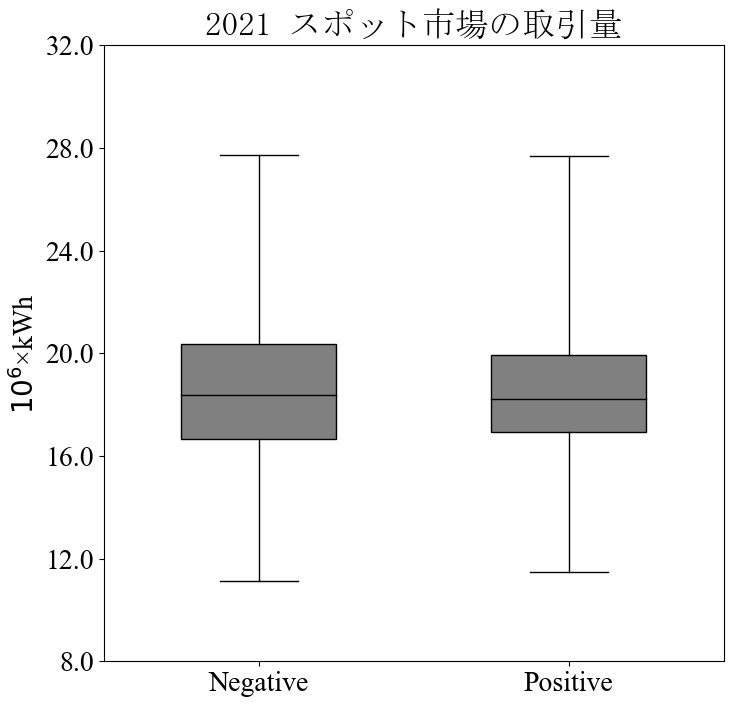

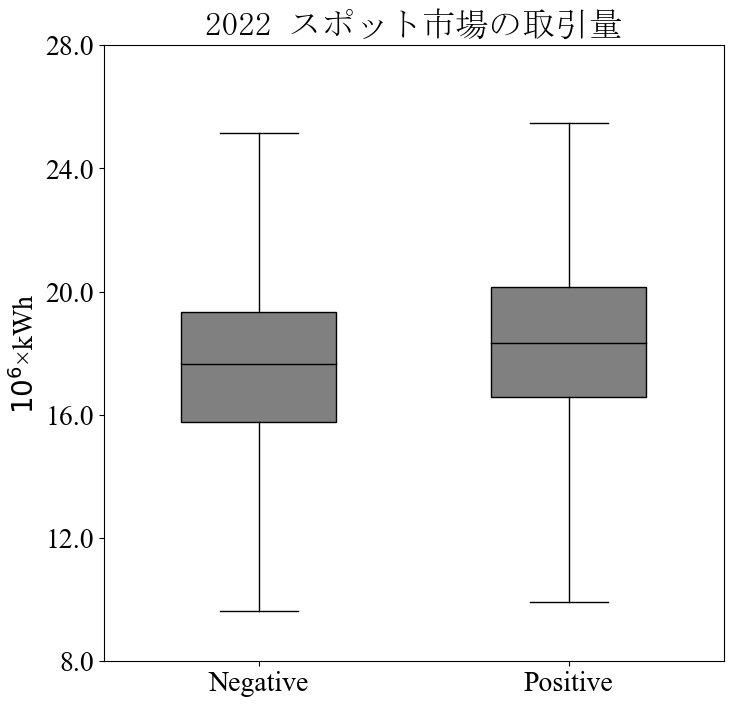

In [56]:
# スポット

for year in range(2018,2023):
    title=f'{year} スポット市場の取引量'
    func_hakohigePLOT('spot_volume(kWh)',year,year,title,'$10^6$×kWh',10**6)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/スポット市場/{save_name}.png')

2018 風力絶対値誤差合算(実績-想定)(kWh)
平均値 negative 47007.5112   positive 49515.1883
中央値 negative 40120.25   positive 41461.06
標準偏差 negative 27967.7773   positive 32543.7295
四分位範囲 negative 33766.195   positive 37610.6164
2019 風力絶対値誤差合算(実績-想定)(kWh)
平均値 negative 47987.754   positive 47642.9816
中央値 negative 42023.1366   positive 41767.0818
標準偏差 negative 27927.0199   positive 28301.2533
四分位範囲 negative 35477.4441   positive 35167.3512
2020 風力絶対値誤差合算(実績-想定)(kWh)
平均値 negative 46782.8135   positive 48829.2704
中央値 negative 39468.4933   positive 42303.3632
標準偏差 negative 29623.3483   positive 29918.9406
四分位範囲 negative 37750.3547   positive 36734.9455
2021 風力絶対値誤差合算(実績-想定)(kWh)
平均値 negative 47633.918   positive 51459.2361
中央値 negative 43185.4313   positive 47666.763
標準偏差 negative 26809.6089   positive 26428.4594
四分位範囲 negative 34725.9534   positive 35289.3141
2022 風力絶対値誤差合算(実績-想定)(kWh)
平均値 negative 53311.0105   positive 52672.3915
中央値 negative 49336.7014   positive 46961.0692
標準偏差 negative 29146.955   positiv

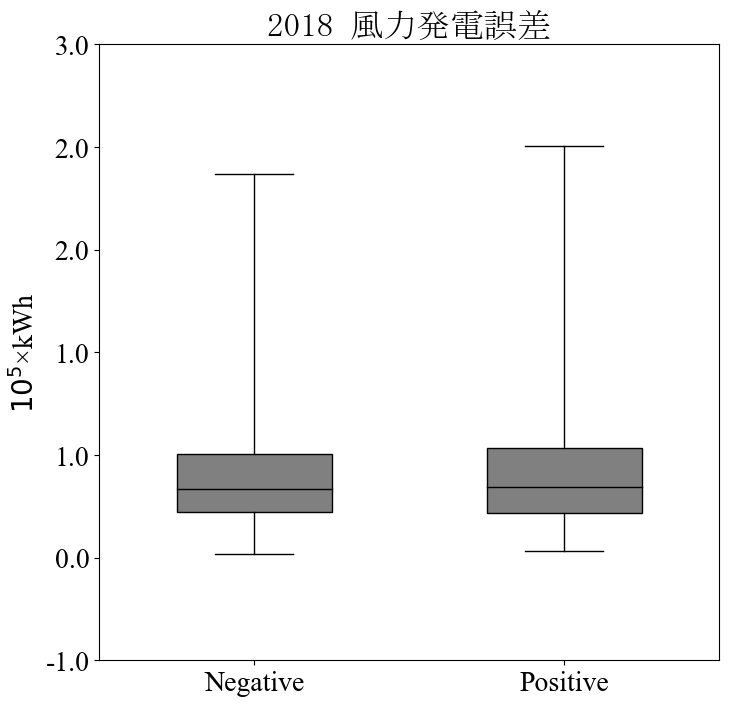

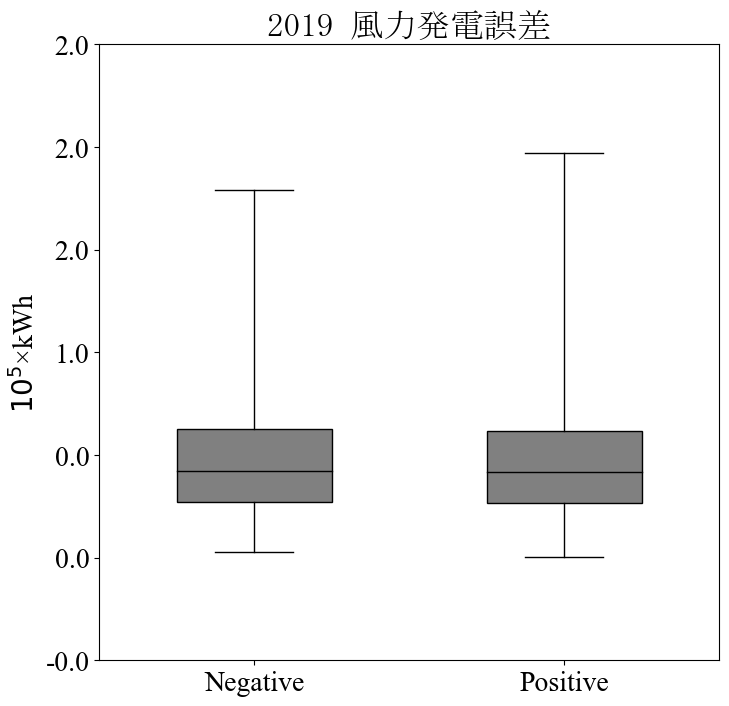

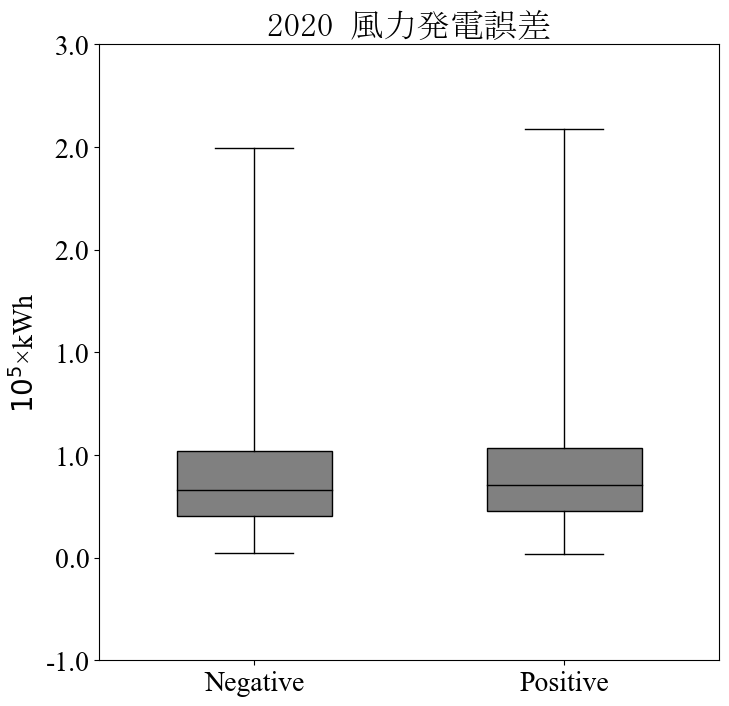

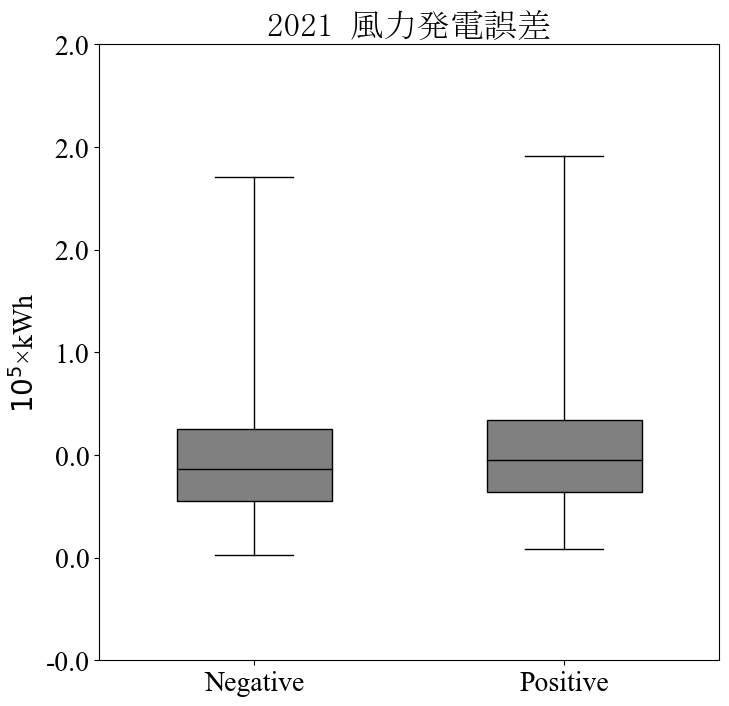

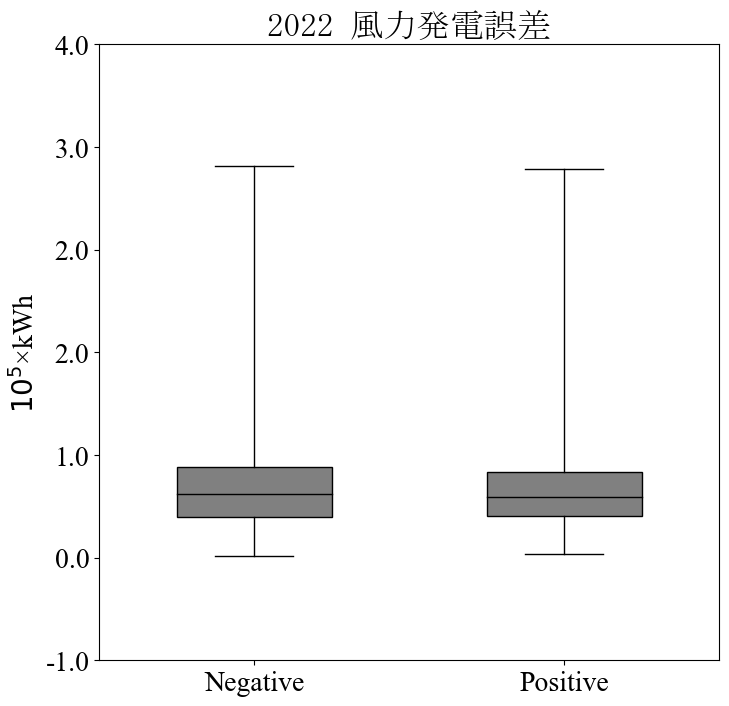

In [53]:
# 風力

for year in range(2018,2023):
    title=f'{year} 風力発電誤差'
    func_hakohigePLOT('風力絶対値誤差合算(実績-想定)(kWh)',year,year,title,'$10^5$×kWh',10**5)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/風力/{save_name}.png')

2018 太陽光絶対値誤差合算(実績-想定)(kWh)
平均値 negative 0.4595   positive 0.461
中央値 negative 0.1527   positive 0.1226
標準偏差 negative 0.6459   positive 0.643
四分位範囲 negative 0.7154   positive 0.7512
2019 太陽光絶対値誤差合算(実績-想定)(kWh)
平均値 negative 0.4346   positive 0.4551
中央値 negative 0.0045   positive 0.1302
標準偏差 negative 0.6605   positive 0.6427
四分位範囲 negative 0.6882   positive 0.7237
2020 太陽光絶対値誤差合算(実績-想定)(kWh)
平均値 negative 0.392   positive 0.4143
中央値 negative 0.0103   positive 0.0825
標準偏差 negative 0.5768   positive 0.5849
四分位範囲 negative 0.6694   positive 0.6794
2021 太陽光絶対値誤差合算(実績-想定)(kWh)
平均値 negative 0.383   positive 0.3505
中央値 negative 0.0256   positive 0.0292
標準偏差 negative 0.5445   positive 0.509
四分位範囲 negative 0.6339   positive 0.5644
2022 太陽光絶対値誤差合算(実績-想定)(kWh)
平均値 negative 0.2985   positive 0.4766
中央値 negative 0.0   positive 0.2681
標準偏差 negative 0.5095   positive 0.5819
四分位範囲 negative 0.4259   positive 0.7874


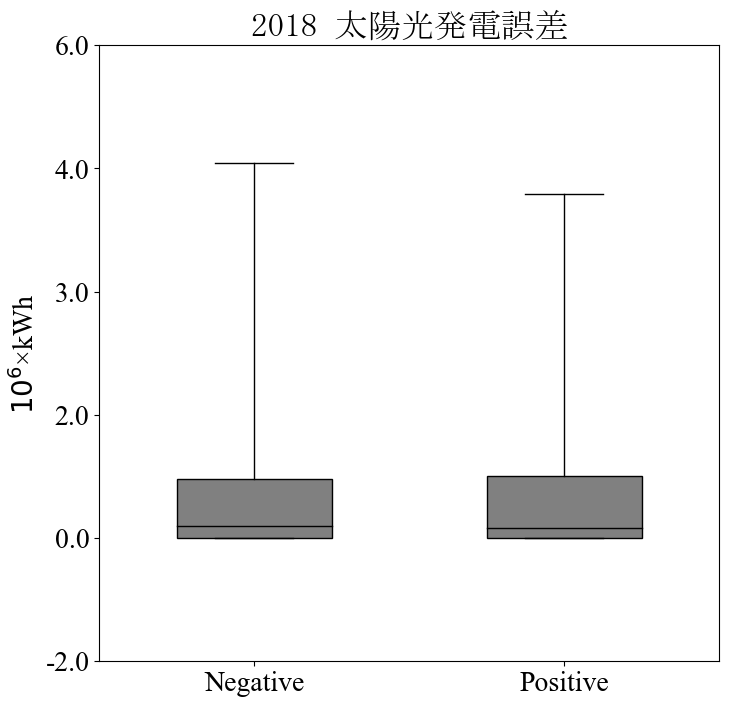

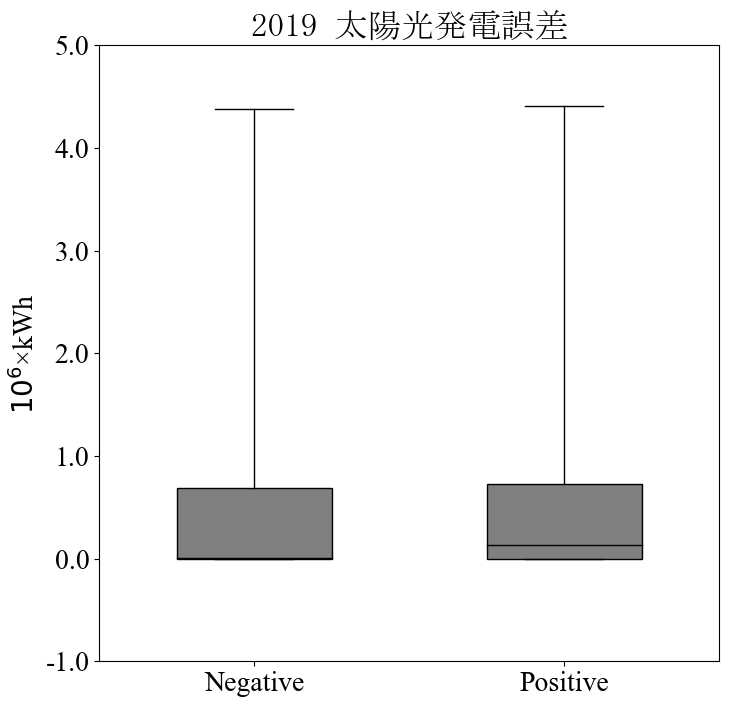

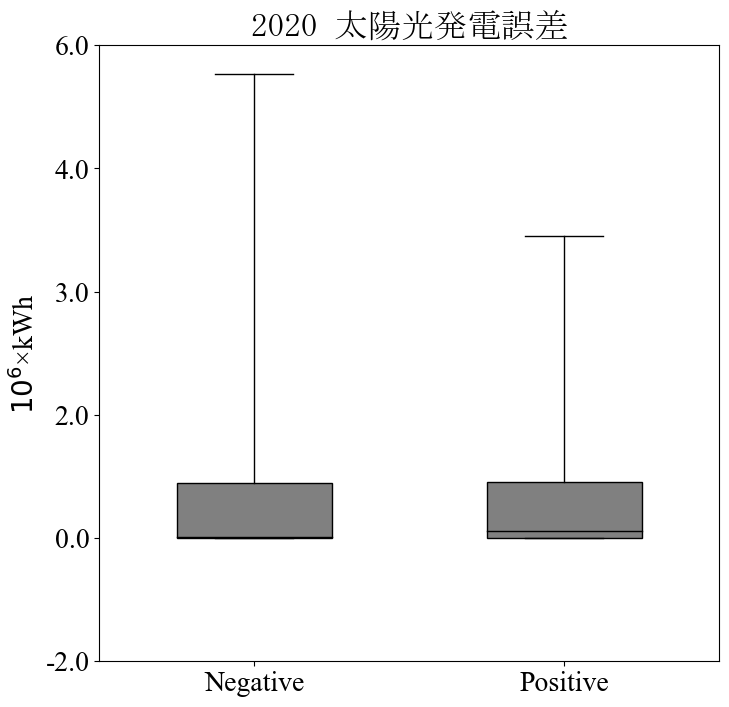

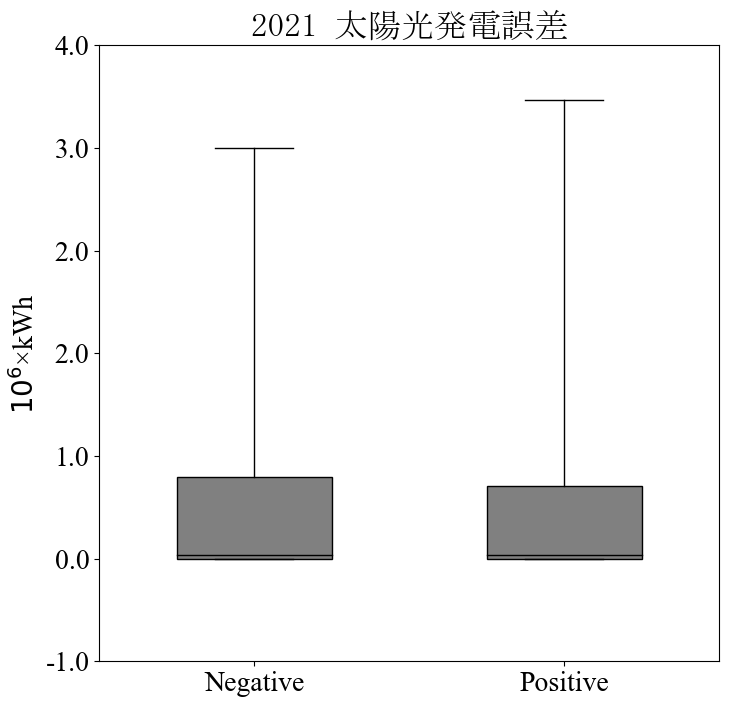

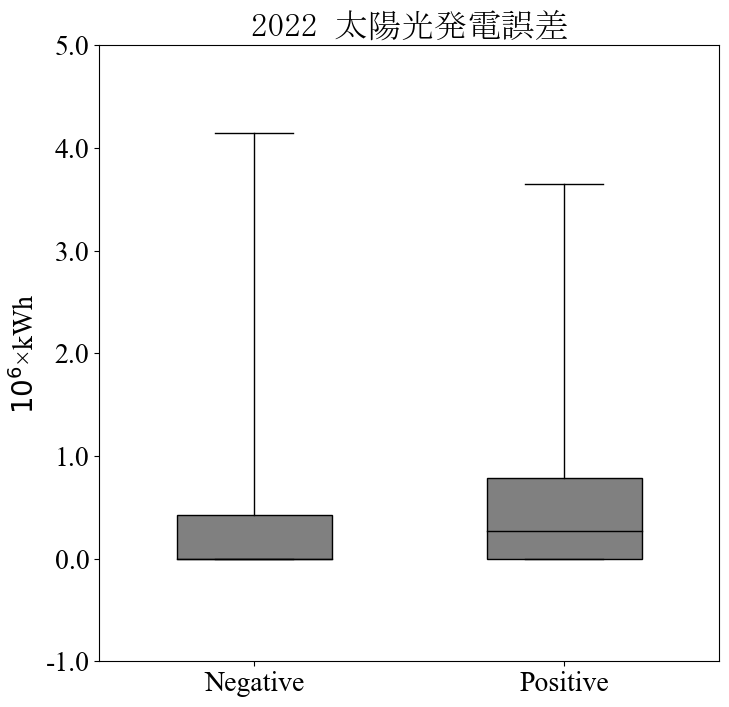

In [47]:
# 太陽光
for year in range(2018,2023):
    title=f'{year} 太陽光発電誤差'
    func_hakohigePLOT('太陽光絶対値誤差合算(実績-想定)(kWh)',year,year,title,'$10^6$×kWh',10**6)
    save_name =title.replace(' ','')
    plt.savefig(f'../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/太陽光/{save_name}.png')



2022 広域予備率平均値(%)
平均値 negative 23.5059   positive 23.4766
中央値 negative 21.9828   positive 22.2589
標準偏差 negative 6.7878   positive 6.6249
四分位範囲 negative 7.9306   positive 8.3397


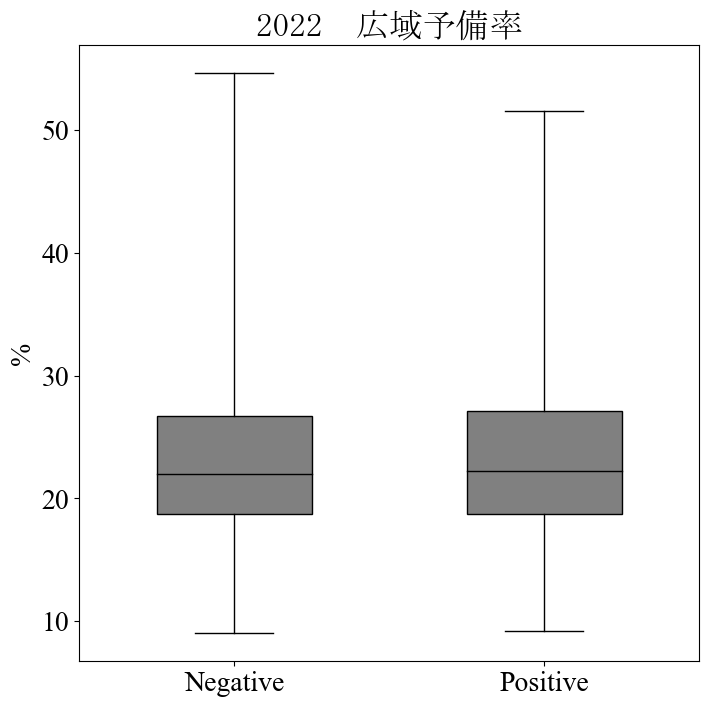

In [48]:
# 広域予備率の箱ひげ


# 広域予備率あり
target =['広域予備率平均値(%)']
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']+target

df_select = df_king[cols].dropna()

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
       ]+target
df_select.columns = re_col
# df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


percent =50
# これは各年

year=2022
start_point = dt.datetime(2022,1,1,0,0)
end_point = dt.datetime(2022,12,31,23,30)
df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

df['judge'] =0

df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

name=re_col[-1]
value0 = df[df['judge']==0][name].values
value1 = df[df['judge']==1][name].values


plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =20
# data = [value2018,value2019,value2020,value2021,value2022]
data=[value0,value1]

fig =plt.figure(figsize=(8,8))
ax1 = fig.subplots()
# ax1.yaxis.set_major_locator(MaxNLocator(5))
ax1.boxplot(data,whis=(0,100),vert=True,  # 横向きにする
           patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='gray',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
           capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
           )
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(['Negative','Positive'])
ax1.set_ylabel('%')
# ax1.set_xlabel('Year')
plt.title(f'{year}  広域予備率'
,fontname='MS Mincho'
)
# plt.savefig('../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/広域予備率/箱ひげ広域予備率.png')

num_round = 4
print(year,target[0])
print('平均値','negative',round(np.mean(value0),num_round),' ','positive',round(np.mean(value1),num_round))
print('中央値','negative',round(np.median(value0),num_round),' ','positive',round(np.median(value1),num_round))
print('標準偏差','negative',round(np.std(value0),num_round),' ','positive',round(np.std(value1),num_round))
print('四分位範囲','negative',round(np.percentile(value0,75)-np.percentile(value0,25),num_round),' ','positive',round(np.percentile(value1,75)-np.percentile(value1,25),num_round))


2022 広域予備率平均値(%)
平均値 negative 23.5059   positive 23.4766
中央値 negative 21.9828   positive 22.2589
標準偏差 negative 6.7878   positive 6.6249
四分位範囲 negative 7.9306   positive 8.3397


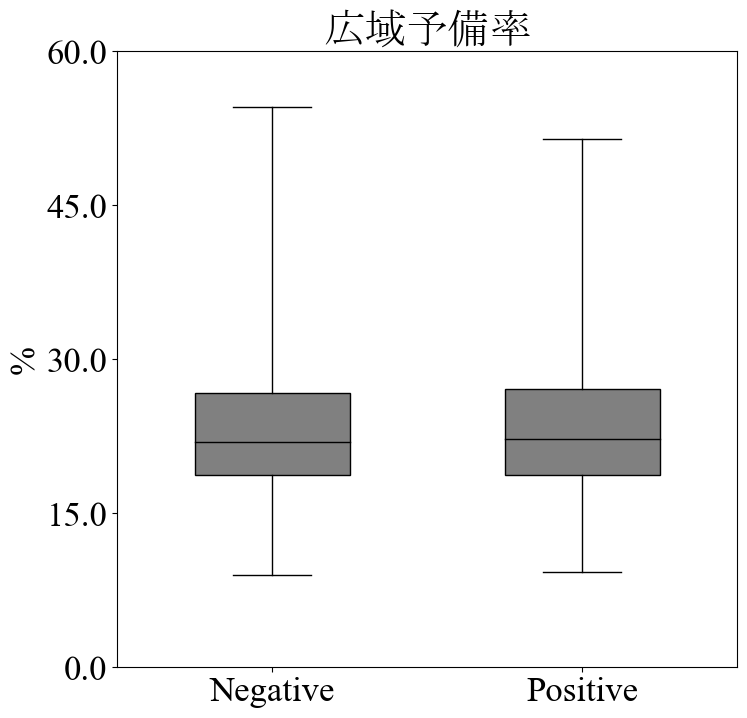

In [86]:
func_hakohigePLOT('広域予備率平均値(%)',2022,2022,'広域予備率','%',1)
plt.savefig('../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/まとめ＿添付用/箱ひげ広域予備率.png')
plt.savefig('../../../卒論関連書類/画像/4章画像_new/要因箱ひげ/広域予備率/箱ひげ広域予備率.png')


In [27]:
title.replace(' ','')

'2022太陽光発電誤差'

In [14]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)

In [ ]:
# 広域予備率の箱ひげ
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =20
# data = [value2018,value2019,value2020,value2021,value2022]


data=[value0,value1]

fig =plt.figure(figsize=(8,8))
ax1 = fig.subplots()
ax1.boxplot(data,whis=(0,100),vert=True,  # 横向きにする
           patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='gray',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
           capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
           )
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(['Negative','Positive'])
ax1.set_ylabel('Price Difference (Yen/kWh)')
# ax1.set_xlabel('Year')
plt.title(f'{year}  広域予備率'
,fontname='MS Mincho'
)